<a href="https://colab.research.google.com/github/ricardo-kowalski/notebooks/blob/master/AULA2_ATIVIDADE_12_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron Multicamadas e Backpropagation

O programa a seguir tem por objetivo construir uma rede neura do tipo Multilayer Perceptron além de treinar essa rede utilizando o algoritmo de retropropagação (Backpropagation), divide-se em 4 partes principais, são elas:


*   Rede: 
 * ligações entre os neurônios, função de ativação utilizada e operações de retropropagação baseadas nas derivadas parciais pré-definidas; 
*   Camadas:
 * define um comportamento específico para cada conjunto de neurônios pertencentes à uma mesma camada;
*  Neurônio:
 * define as funções realizadas em cada neurônio de acordo com sua camada tato na propagação quanto na retropropagação;
* I/O
 * definição das entradas , saídas, camadas, neurônios, pesos, bem como a quantidade de cada uma;



Importando as bibliotecas necessárias

In [0]:
import random   #usada caso alguns valores não sejam declarados na chamada das classes
import math

>![picture](https://matthewmazur.files.wordpress.com/2018/03/neural_network-7.png)


A primeira parte do código define a classe 'NeuralNetwork' que recebe os argumentos:


**num_inputs**
> Número
>$n$
de entradas 
>$x_1, x_2, ... , x_n$
da rede
> (no exemplo temos apenas 2 entradas definidas por 
>$i_1$ 
e 
>$i_2$
)

**num_hidden**
> Número de neurônios da camada oculta (hidden)
>$h_1, h_2, ... , h_n$
da rede
> (no exemplo são dois:
>$h_1$ 
e 
>$h_2$
)


**num_outputs**
> Número de neurônios da camada de saída (output)
>$o_1, o_2, ... , o_n$
da rede
> (no exemplo são dois:
>$o_1$ 
e 
>$o_2$
) 

**hidden_layer_weights**
>Pesos da primeira camada
>$w_1, w_2,w_3 , w_4$ 

**hidden_layer_bias**
> Valor do viés 
>$b_1$
>da primeira camada (bias)

**output_layer_weights**
>Pesos da segunda camada
>$w_5, w_6,w_7 , w_8$ 

**output_layer_bias**
> Valor do viés 
>$b_2$
>da segunda camada (bias)

Obs.: A  rede da imagem acima possui apenas duas camadas, uma camada oculta(hidden layer) e uma camada de saída (output layer), note que as entradas em verde não fazem parte de uma camada.


In [0]:
class NeuralNetwork:
    LEARNING_RATE = 0.5

    def __init__(self, num_inputs, num_hidden, num_outputs, hidden_layer_weights = None, hidden_layer_bias = None, output_layer_weights = None, output_layer_bias = None):
        self.num_inputs = num_inputs

        self.hidden_layer = NeuronLayer(num_hidden, hidden_layer_bias)
        self.output_layer = NeuronLayer(num_outputs, output_layer_bias)

        self.init_weights_from_inputs_to_hidden_layer_neurons(hidden_layer_weights)
        self.init_weights_from_hidden_layer_neurons_to_output_layer_neurons(output_layer_weights)
    
    #Caso os pesos entre a entrada e a primeira camada não estejam definidos em 'hidden_layer_weights', a função escolhe seus valores iniciais aleatóriamente
    def init_weights_from_inputs_to_hidden_layer_neurons(self, hidden_layer_weights):
        weight_num = 0
        for h in range(len(self.hidden_layer.neurons)):
            for i in range(self.num_inputs):
                if not hidden_layer_weights:
                    self.hidden_layer.neurons[h].weights.append(random.random())
                else:
                    self.hidden_layer.neurons[h].weights.append(hidden_layer_weights[weight_num])
                weight_num += 1
    
    #Caso os pesos entre a camada oculta e a camada de ssaída não estejam definidos em 'output_layer_weights', a função escolhe seus valores iniciais aleatóriamente            
    def init_weights_from_hidden_layer_neurons_to_output_layer_neurons(self, output_layer_weights):
        weight_num = 0
        for o in range(len(self.output_layer.neurons)):
            for h in range(len(self.hidden_layer.neurons)):
                if not output_layer_weights:
                    self.output_layer.neurons[o].weights.append(random.random())
                else:
                    self.output_layer.neurons[o].weights.append(output_layer_weights[weight_num])
                weight_num += 1

    def inspect(self):
        print('------')
        print('* Inputs: {}'.format(self.num_inputs))
        print('------')
        print('Hidden Layer')
        self.hidden_layer.inspect()
        print('------')
        print('* Output Layer')
        self.output_layer.inspect()
        print('------')

    def feed_forward(self, inputs):
        hidden_layer_outputs = self.hidden_layer.feed_forward(inputs)
        return self.output_layer.feed_forward(hidden_layer_outputs)

    # Usa aprendizado on-line, ou seja, atualiza os pesos após cada caso de treinamento
    def train(self, training_inputs, training_outputs):
        self.feed_forward(training_inputs)

        # 1. Deltas de neurônios de saída
        pd_errors_wrt_output_neuron_total_net_input = [0] * len(self.output_layer.neurons)
        for o in range(len(self.output_layer.neurons)):

            # ∂E/∂zⱼ
            pd_errors_wrt_output_neuron_total_net_input[o] = self.output_layer.neurons[o].calculate_pd_error_wrt_total_net_input(training_outputs[o])

        # 2. Deltas do neurônio oculto
        pd_errors_wrt_hidden_neuron_total_net_input = [0] * len(self.hidden_layer.neurons)
        for h in range(len(self.hidden_layer.neurons)):

            # Calcula a derivada do erro em relação à saída de cada neurônio da camada oculta
            # dE/dyⱼ = Σ ∂E/∂zⱼ * ∂z/∂yⱼ = Σ ∂E/∂zⱼ * wᵢⱼ
            d_error_wrt_hidden_neuron_output = 0
            for o in range(len(self.output_layer.neurons)):
                d_error_wrt_hidden_neuron_output += pd_errors_wrt_output_neuron_total_net_input[o] * self.output_layer.neurons[o].weights[h]

            # ∂E/∂zⱼ = dE/dyⱼ * ∂zⱼ/∂
            pd_errors_wrt_hidden_neuron_total_net_input[h] = d_error_wrt_hidden_neuron_output * self.hidden_layer.neurons[h].calculate_pd_total_net_input_wrt_input()

        # 3. Atualiza os pesos dos neurônios de saída
        for o in range(len(self.output_layer.neurons)):
            for w_ho in range(len(self.output_layer.neurons[o].weights)):

                # ∂Eⱼ/∂wᵢⱼ = ∂E/∂zⱼ * ∂zⱼ/∂wᵢⱼ
                pd_error_wrt_weight = pd_errors_wrt_output_neuron_total_net_input[o] * self.output_layer.neurons[o].calculate_pd_total_net_input_wrt_weight(w_ho)

                # Δw = α * ∂Eⱼ/∂wᵢ
                self.output_layer.neurons[o].weights[w_ho] -= self.LEARNING_RATE * pd_error_wrt_weight

        # 4. Atualiza os pesos dos neurônios ocultos
        for h in range(len(self.hidden_layer.neurons)):
            for w_ih in range(len(self.hidden_layer.neurons[h].weights)):

                # ∂Eⱼ/∂wᵢ = ∂E/∂zⱼ * ∂zⱼ/∂wᵢ
                pd_error_wrt_weight = pd_errors_wrt_hidden_neuron_total_net_input[h] * self.hidden_layer.neurons[h].calculate_pd_total_net_input_wrt_weight(w_ih)

                # Δw = α * ∂Eⱼ/∂wᵢ
                self.hidden_layer.neurons[h].weights[w_ih] -= self.LEARNING_RATE * pd_error_wrt_weight

    def calculate_total_error(self, training_sets):
        total_error = 0
        for t in range(len(training_sets)):
            training_inputs, training_outputs = training_sets[t]
            self.feed_forward(training_inputs)
            for o in range(len(training_outputs)):
                total_error += self.output_layer.neurons[o].calculate_error(training_outputs[o])
        return total_error


In [0]:
class NeuronLayer:
    def __init__(self, num_neurons, bias):

        # Cada neurônio em uma camada compartilha o mesmo viés
        self.bias = bias if bias else random.random()

        self.neurons = []
        for i in range(num_neurons):
            self.neurons.append(Neuron(self.bias))

    def inspect(self):
        print('Neurons:', len(self.neurons))
        for n in range(len(self.neurons)):
            print(' Neuron', n)
            for w in range(len(self.neurons[n].weights)):
                print('  Weight:', self.neurons[n].weights[w])
            print('  Bias:', self.bias)

    def feed_forward(self, inputs):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.calculate_output(inputs))
        return outputs

    def get_outputs(self):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.output)
        return outputs


In [0]:
class Neuron:
    def __init__(self, bias):
        self.bias = bias
        self.weights = []

    def calculate_output(self, inputs):
        self.inputs = inputs
        self.output = self.squash(self.calculate_total_net_input())
        return self.output

    def calculate_total_net_input(self):
        total = 0
        for i in range(len(self.inputs)):
            total += self.inputs[i] * self.weights[i]
        return total + self.bias

    # Aplica a função logística na saída do neurônio
    # O resultado é por vezes referido como 'net' [2] ou 'net' [1]
    def squash(self, total_net_input):
        return 1 / (1 + math.exp(-total_net_input))

    # Determina quanto a entrada total do neurônio precisa mudar para se aproximar da saída esperada
    #
    # Agora que temos a derivada parcial do erro em relação à saída (∂E / ∂yⱼ) e
    # a derivada da saída em relação à entrada líquida total (dyⱼ / dzⱼ) podemos calcular
    # a derivada parcial do erro em relação à entrada líquida total.
    # Esse valor também é conhecido como o delta (δ) [1]
    # δ = ∂E/∂zⱼ = ∂E/∂yⱼ * dyⱼ/dzⱼ
    #
    def calculate_pd_error_wrt_total_net_input(self, target_output):
        return self.calculate_pd_error_wrt_output(target_output) * self.calculate_pd_total_net_input_wrt_input();

    # O erro de cada neurônio é calculado pelo método do Erro Quadrático Médio:
    def calculate_error(self, target_output):
        return 0.5 * (target_output - self.output) ** 2

    # A derivada parcial do erro em relação à saída obtida é calculada por:
    # = 2 * 0.5 * (saída esperada - saída obtida) ^ (2 - 1) * -1
    # = - (saída esperada - saída obtida)
    #
    # Alternativamente, você pode usar (target-output), mas então precisa adicioná-la durante a retropropagação [3]
    #
    # Observe que a saída obtida do neurônio de saída é geralmente escrita como yⱼ e a saída esperada como tⱼ então:
    # = ∂E/∂yⱼ = -(tⱼ - yⱼ)
    def calculate_pd_error_wrt_output(self, target_output):
        return -(target_output - self.output)

    # A função 'net' do neurônio é combinada usando a função logística para calcular a saída do neurônio:
    # yⱼ = φ = 1 / (1 + e ^ (- zⱼ))
    # Observe que onde ⱼ representa a saída dos neurônios em qualquer camada que estamos olhando e ᵢ representa a camada abaixo dela
    #
    # A derivada (não derivada parcial, uma vez que existe apenas uma variável) da saída é:
    # dyⱼ/dzⱼ = yⱼ * (1 - yⱼ)
    def calculate_pd_total_net_input_wrt_input(self):
        return self.output * (1 - self.output)

    # A função 'net' é a soma ponderada de todas as entradas para o neurônio e seus respectivos pesos:
    # = zⱼ = netⱼ = x₁w₁ + x₂w₂ ...
    #
    # A derivada parcial da função 'net' com o respectivo peso (com todo o resto mantido constante) é então:
    # = ∂zⱼ / ∂wᵢ = c + 1 * xᵢw₁ ^ (1-0) + c ... = xᵢ
    def calculate_pd_total_net_input_wrt_weight(self, index):
        return self.inputs[index]


##Aplicando o programa ao exemplo a seguir##

>![picture](https://matthewmazur.files.wordpress.com/2018/03/neural_network-9.png)

In [5]:
#criando a rede neural conforme o exemplo acima
nn = NeuralNetwork(2, 2, 2, hidden_layer_weights=[0.15, 0.2, 0.25, 0.3], 
                    hidden_layer_bias=0.35, output_layer_weights=[0.4, 0.45, 0.5, 0.55], 
                    output_layer_bias=0.6)

#imprime a configuração da rede
nn.inspect()                    

------
* Inputs: 2
------
Hidden Layer
Neurons: 2
 Neuron 0
  Weight: 0.15
  Weight: 0.2
  Bias: 0.35
 Neuron 1
  Weight: 0.25
  Weight: 0.3
  Bias: 0.35
------
* Output Layer
Neurons: 2
 Neuron 0
  Weight: 0.4
  Weight: 0.45
  Bias: 0.6
 Neuron 1
  Weight: 0.5
  Weight: 0.55
  Bias: 0.6
------


In [6]:
#quantidade de épocas para o treinamento da rede
epocs = 1001

total_error = []  #cria um array para os erros totais


#treinamento
for i in range(epocs):
    
    nn.train([0.05, 0.1], [0.01, 0.99])
    
    total_error.append(round(nn.calculate_total_error([[[0.05, 0.1], [0.01, 0.99]]]), 9))
    
    #imprime os valores dos pesos após o treinamento
    if i == (epocs-1):
        print('Epochs:',i,'\nTotal Error:', total_error[i])
        nn.inspect()

Epochs: 1000 
Total Error: 0.001112917
------
* Inputs: 2
------
Hidden Layer
Neurons: 2
 Neuron 0
  Weight: 0.2820847122641089
  Weight: 0.4641694245282168
  Bias: 0.35
 Neuron 1
  Weight: 0.3806319502075894
  Weight: 0.5612639004151764
  Bias: 0.35
------
* Output Layer
Neurons: 2
 Neuron 0
  Weight: -3.064528610358445
  Weight: -3.035163971161515
  Bias: 0.6
 Neuron 1
  Weight: 2.0521069380090884
  Weight: 2.1112898194388485
  Bias: 0.6
------


##Resultados##

In [7]:
print(total_error) 

[0.291027774, 0.283547133, 0.275943289, 0.268232761, 0.260434393, 0.252569176, 0.244659999, 0.236731316, 0.228808741, 0.220918592, 0.213087389, 0.205341328, 0.197705769, 0.190204742, 0.182860503, 0.175693166, 0.168720403, 0.16195725, 0.155415989, 0.149106135, 0.14303449, 0.137205276, 0.131620316, 0.126279262, 0.121179847, 0.116318143, 0.111688831, 0.107285459, 0.103100677, 0.099126464, 0.095354325, 0.091775464, 0.088380932, 0.085161757, 0.082109043, 0.079214055, 0.076468284, 0.073863495, 0.071391768, 0.069045516, 0.066817506, 0.064700863, 0.062689072, 0.060775976, 0.058955766, 0.057222975, 0.05557246, 0.053999393, 0.052499243, 0.051067764, 0.049700977, 0.048395156, 0.047146814, 0.045952686, 0.044809717, 0.043715048, 0.042666004, 0.041660079, 0.040694928, 0.039768356, 0.038878306, 0.03802285, 0.037200182, 0.036408606, 0.035646534, 0.034912472, 0.03420502, 0.033522862, 0.032864759, 0.032229549, 0.031616135, 0.031023487, 0.030450633, 0.029896659, 0.0293607, 0.028841943, 0.028339618, 0.027

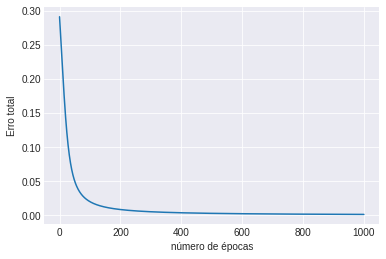

In [8]:
import matplotlib.pyplot as plt

#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')

plt.plot(total_error)
plt.ylabel('Erro total')
plt.xlabel('número de épocas')
plt.show()

###Referências:###

    link: <https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/>
    link: <https://github.com/mattm/simple-neural-network>
    